In [452]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU, LeakyReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [453]:
df = pd.read_csv('io-bytes-experimental-group.csv')
df

,vms,bytesIn,bytesOut
0,10,94409,54308
1,20,674656,208973
2,30,2219595,460397
3,40,4562333,868538
4,50,6993231,1108255


In [454]:
df.corr()

,vms,bytesIn,bytesOut
vms,1.000000,0.97645,0.989222
bytesIn,0.976450,1.00000,0.991830
bytesOut,0.989222,0.99183,1.000000


In [455]:
df = df.dropna() # drop all rows that have NAN/none
df['sum'] = (df['bytesIn']+df['bytesOut'])/1024/1024
df

,vms,bytesIn,bytesOut,sum
0,10,94409,54308,0.141828
1,20,674656,208973,0.842694
2,30,2219595,460397,2.555840
3,40,4562333,868538,5.179282
4,50,6993231,1108255,7.726179


In [456]:
x_data = df.iloc[:,:1]   # 첫 열만
y_data = df.iloc[:,[-1]]  # 마지막 열만

scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform( np.log(y_data) )
y.shape

torch.Size([5, 1])

In [457]:
x = torch.FloatTensor( x_dataN ) # 특성 데이터
y = torch.FloatTensor( y_dataN ) # 라벨

In [458]:
class ExpModel(Module):
    def __init__(self):
        super().__init__()
        self.fc1 = Linear(1,1)
    
    def forward(self, x):
        x = self.fc1(x)
        
        return x       
        

In [459]:
# model = Sequential()
# model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2028],
         [ 0.0079],
         [-0.9693],
         [ 0.9447],
         [-0.7295],
         [ 1.3684],
         [ 1.1968],
         [ 1.0964],
         [ 0.0383],
         [-1.7893]], requires_grad=True),
 Parameter containing:
 tensor([-0.4078,  0.4394, -0.3012, -0.9618,  0.9876, -0.8261,  0.6742,  0.0120,
         -0.2153,  0.4473], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4105,  0.1170, -0.2045,  0.0883, -0.3839, -0.5391,  0.4216,  0.3097,
          -0.0757, -0.3624]], requires_grad=True),
 Parameter containing:
 tensor([0.1999], requires_grad=True)]

In [460]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters())

In [461]:
hist = []
for step in range(3000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()    
    if step % 1000 == 0:
        print(step, cost.item())
    hist.append(cost.item())

0 2.161579914172762e-06
1000 6.396704048611604e-14
2000 2.0092980057562215e-10


In [462]:
# model[0].bias

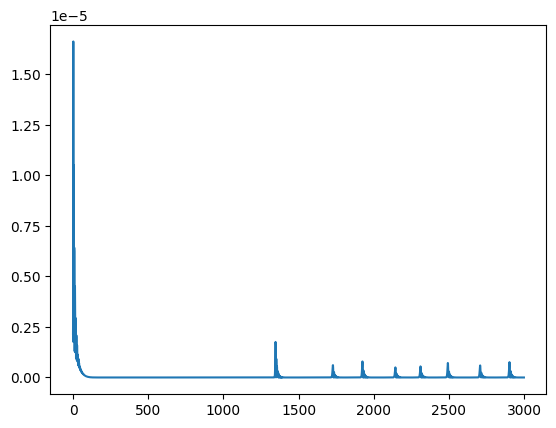

In [463]:
plt.plot(hist)
plt.show()

In [464]:
# print(model[0].weight)
# print(model[0].bias)

In [465]:
# model( torch.FloatTensor([[15]]))
predN = model(x).detach().numpy()
pred = scaleL.inverse_transform(predN)

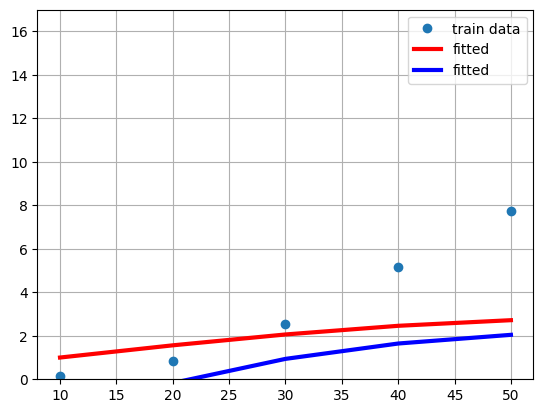

In [466]:
plt.ylim([0, 17])
plt.plot(x_data, y_data, 'o', label='train data')
# plt.scatter(x_data, y_data)
plt.plot(x_data, np.exp(model(x).data.numpy()), '-r', linewidth=3, label='fitted') # r-- : Red, dashed line
plt.plot(x_data, pred, '-b', linewidth=3, label='fitted') # r-- : Red, dashed line
plt.grid()
plt.legend()
plt.show()